In [2]:
from pymemcache.client.hash import HashClient
import time

# Configuração do cluster
servers = [
    ('localhost', 11211),
    ('localhost', 11212),
    ('localhost', 11213),
    ('localhost', 11214),
]

# Cria um HashClient para distribuir as chaves entre os nós
hash_client = HashClient(servers)

# Tamanho do dataset (1x, 10x, 100x)
dataset_size = 1000000  # Altere aqui para 10000 (1x), 100000 (10x), 1000000 (100x)

# Test data
data = {f'key{i}': f'value{i}' for i in range(dataset_size)}

# Insert (Create)
start_time = time.time()
for key, value in data.items():
    hash_client.set(key, value)
insert_time = time.time() - start_time

# Read (Get)
start_time = time.time()
for key in data.keys():
    hash_client.get(key)
read_time = time.time() - start_time

# Update (Set)
start_time = time.time()
for key, value in data.items():
    hash_client.set(key, f'updated_{value}')
update_time = time.time() - start_time

# Delete (Remove)
start_time = time.time()
for key in data.keys():
    hash_client.delete(key)
delete_time = time.time() - start_time

# Print results
print(f"Dataset Size: {dataset_size} items")
print(f"Insert Time: {insert_time:.2f} seconds")
print(f"Read Time: {read_time:.2f} seconds")
print(f"Update Time: {update_time:.2f} seconds")
print(f"Delete Time: {delete_time:.2f} seconds")

Dataset Size: 1000000 items
Insert Time: 115.01 seconds
Read Time: 617.30 seconds
Update Time: 106.34 seconds
Delete Time: 108.47 seconds


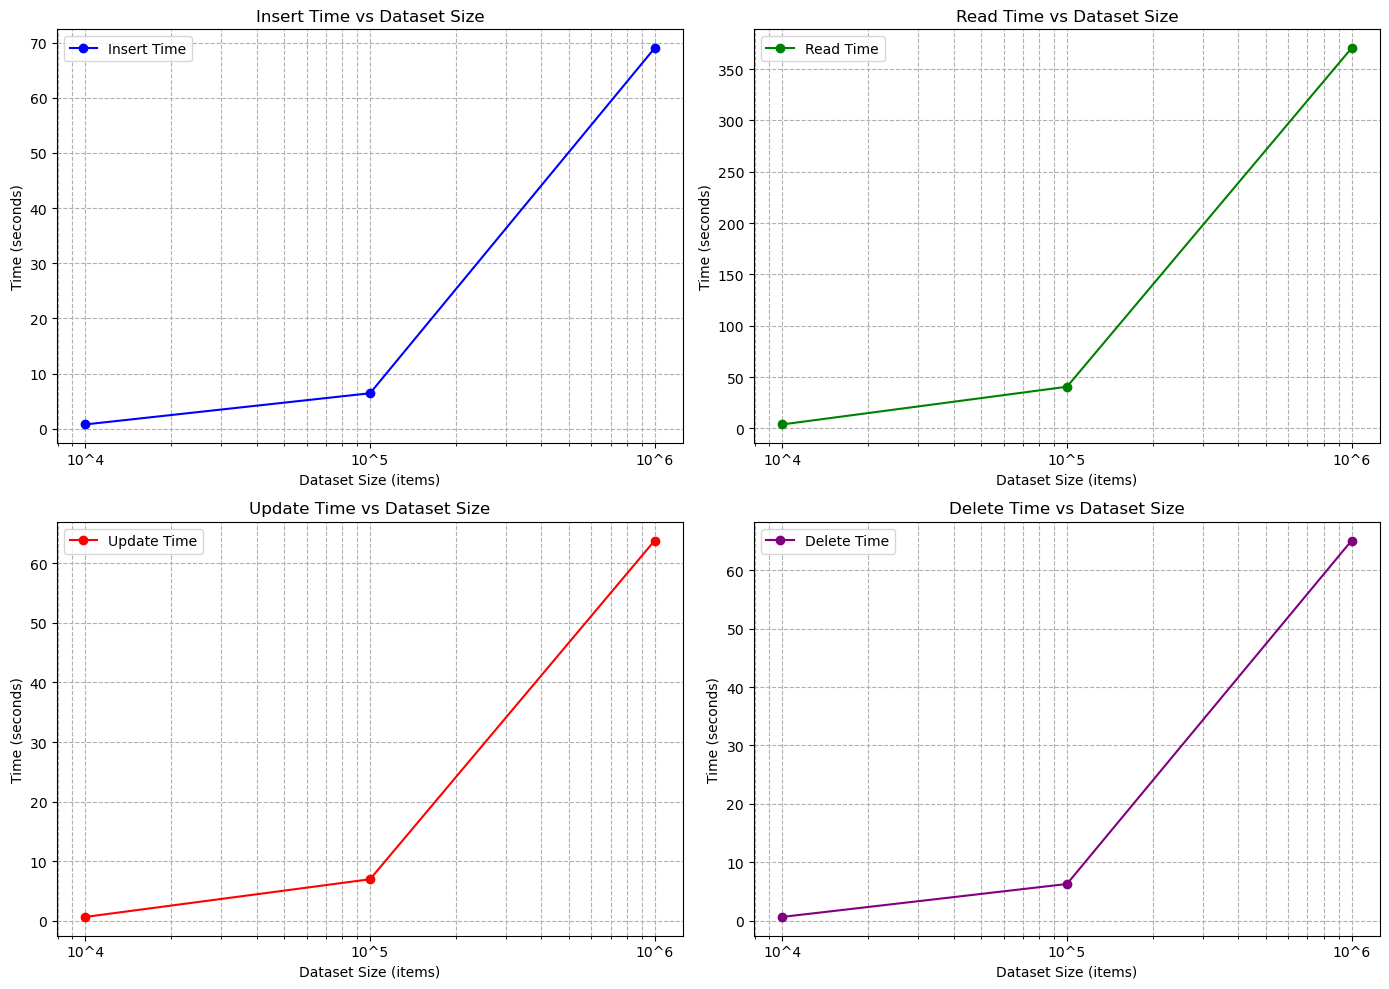

In [ ]:
import matplotlib.pyplot as plt

# Dados dos benchmarks 1 CPU
dataset_sizes_1 = [10000, 100000, 1000000]  # 1x, 10x, 100x
insert_times_1 = [1.32, 10.74, 115.01]
read_times_1 = [6.51, 67.67, 617.30]
update_times_1 = [1.09, 11.62, 106.34]
delete_times_1 = [1.06, 10.47, 108.47]

# Dados dos benchmarks 2 CPU
dataset_sizes = [10000, 100000, 1000000]  # 1x, 10x, 100x
insert_times = [0.79, 6.44, 69.01]
read_times = [3.91, 40.60, 370.38]
update_times = [0.65, 6.97, 63.80]
delete_times = [0.64, 6.28, 65.08]
# Criando os gráficos
plt.figure(figsize=(14, 10))

# Gráfico de Insert
plt.subplot(2, 2, 1)
plt.plot(dataset_sizes, insert_times, marker='o', color='blue', label='Insert Time')
plt.xscale('log')  # Escala logarítmica no eixo x
plt.xticks(dataset_sizes, labels=['10^4', '10^5', '10^6'])  # Rótulos personalizados
plt.title('Insert Time vs Dataset Size')
plt.xlabel('Dataset Size (items)')
plt.ylabel('Time (seconds)')
plt.grid(True, which="both", ls="--")
plt.legend()

# Gráfico de Read
plt.subplot(2, 2, 2)
plt.plot(dataset_sizes, read_times, marker='o', color='green', label='Read Time')
plt.xscale('log')  # Escala logarítmica no eixo x
plt.xticks(dataset_sizes, labels=['10^4', '10^5', '10^6'])  # Rótulos personalizados
plt.title('Read Time vs Dataset Size')
plt.xlabel('Dataset Size (items)')
plt.ylabel('Time (seconds)')
plt.grid(True, which="both", ls="--")
plt.legend()

# Gráfico de Update
plt.subplot(2, 2, 3)
plt.plot(dataset_sizes, update_times, marker='o', color='red', label='Update Time')
plt.xscale('log')  # Escala logarítmica no eixo x
plt.xticks(dataset_sizes, labels=['10^4', '10^5', '10^6'])  # Rótulos personalizados
plt.title('Update Time vs Dataset Size')
plt.xlabel('Dataset Size (items)')
plt.ylabel('Time (seconds)')
plt.grid(True, which="both", ls="--")
plt.legend()

# Gráfico de Delete
plt.subplot(2, 2, 4)
plt.plot(dataset_sizes, delete_times, marker='o', color='purple', label='Delete Time')
plt.xscale('log')  # Escala logarítmica no eixo x
plt.xticks(dataset_sizes, labels=['10^4', '10^5', '10^6'])  # Rótulos personalizados
plt.title('Delete Time vs Dataset Size')
plt.xlabel('Dataset Size (items)')
plt.ylabel('Time (seconds)')
plt.grid(True, which="both", ls="--")
plt.legend()

# Ajustar layout e exibir os gráficos
plt.tight_layout()
plt.show()


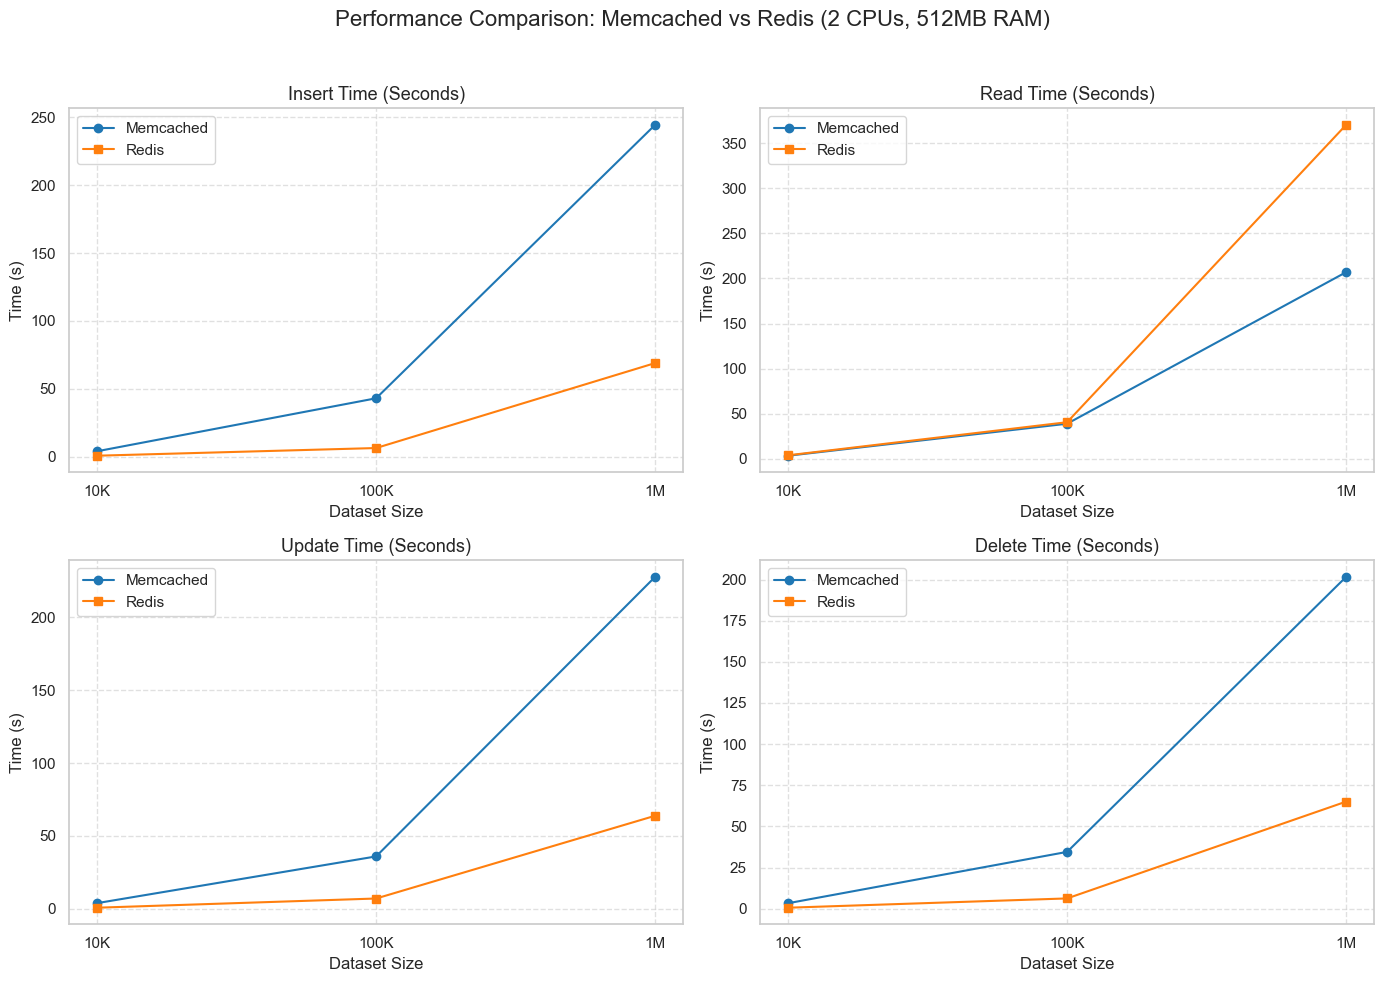

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset sizes
dataset_sizes = [10000, 100000, 1000000]  # 1x, 10x, 100x
labels = ['10K', '100K', '1M']

# Memcached performance times (seconds)
memcached_times = {
    "Insert": [4.07, 43.09, 244.44],
    "Read": [3.45, 38.93, 207.00],
    "Update": [3.80, 35.88, 227.88],
    "Delete": [3.38, 34.55, 201.60]
}

# Redis performance times (seconds)
redis_times = {
    "Insert": [0.79, 6.44, 69.01],
    "Read": [3.91, 40.60, 370.38],
    "Update": [0.65, 6.97, 63.80],
    "Delete": [0.64, 6.28, 65.08]
}

# Set seaborn style
sns.set_theme(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Performance Comparison: Memcached vs Redis (2 CPUs, 512MB RAM)", fontsize=16)

# Operation labels
operations = ["Insert", "Read", "Update", "Delete"]
colors = ["#1f77b4", "#ff7f0e"]  # Blue for Memcached, Orange for Redis

# Iterate through operations and plot
for i, op in enumerate(operations):
    ax = axes[i // 2, i % 2]
    
    # Plot Memcached
    ax.plot(labels, memcached_times[op], marker='o', linestyle='-', color=colors[0], label="Memcached")
    
    # Plot Redis
    ax.plot(labels, redis_times[op], marker='s', linestyle='-', color=colors[1], label="Redis")
    
    # Labels and title
    ax.set_title(f"{op} Time (Seconds)", fontsize=13)
    ax.set_xlabel("Dataset Size")
    ax.set_ylabel("Time (s)")
    ax.legend()
    ax.grid(True, linestyle="--", alpha=0.6)

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

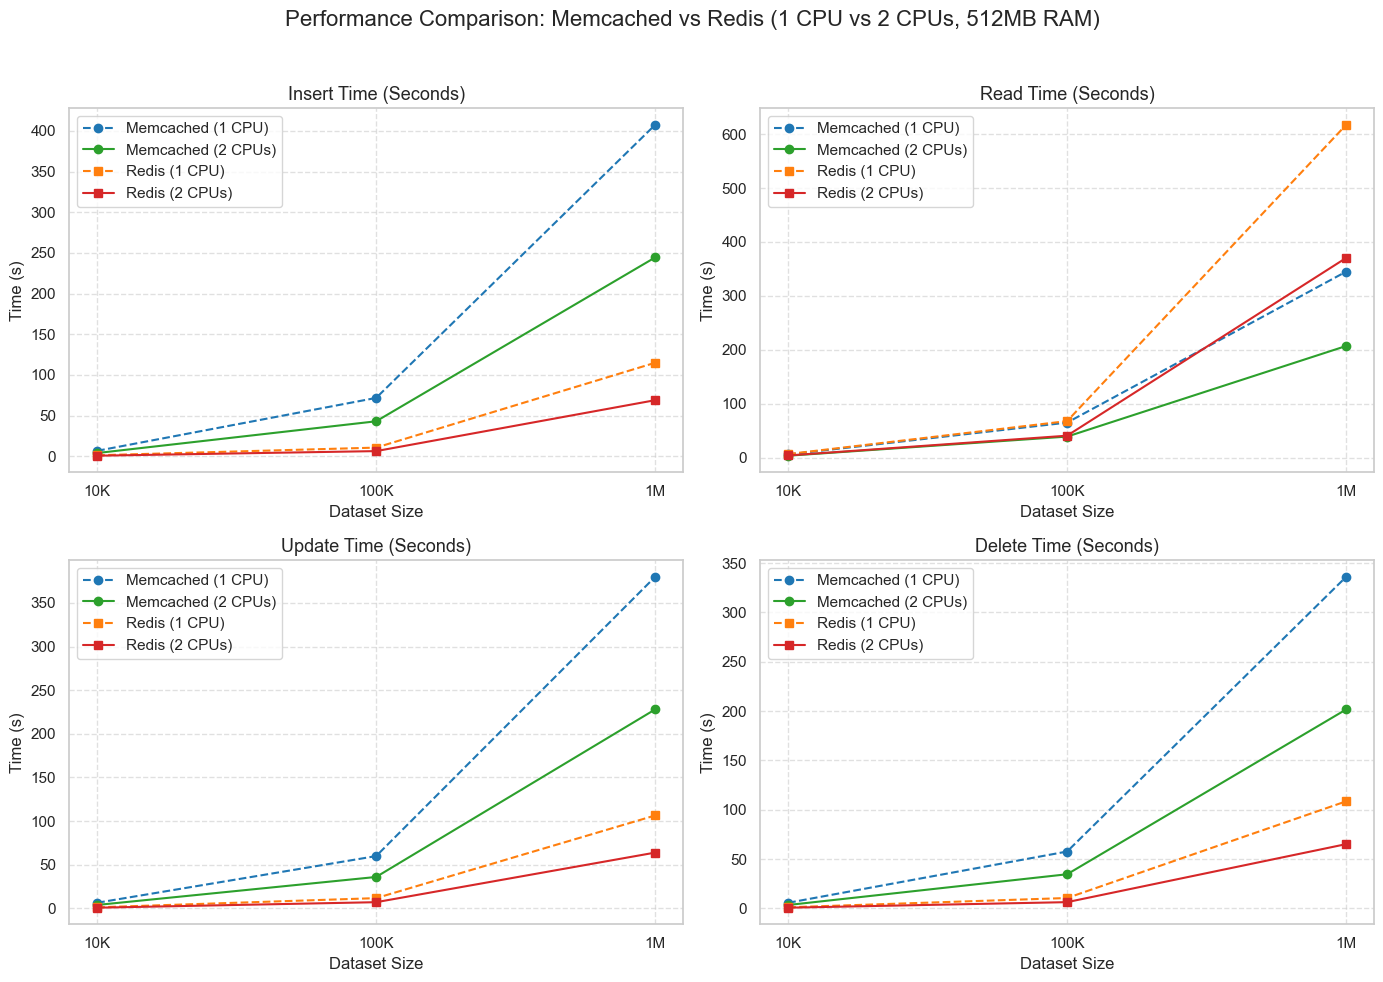

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset sizes
dataset_sizes = [10000, 100000, 1000000]
labels = ['10K', '100K', '1M']

# Memcached - First Test (1 CPU, 512MB)
memcached_1 = {
    "Insert": [6.79, 71.82, 407.40],
    "Read": [5.75, 64.89, 345.00],
    "Update": [6.33, 59.80, 379.80],
    "Delete": [5.63, 57.59, 336.00]
}

# Memcached - Second Test (2 CPUs, 512MB)
memcached_2 = {
    "Insert": [4.07, 43.09, 244.44],
    "Read": [3.45, 38.93, 207.00],
    "Update": [3.80, 35.88, 227.88],
    "Delete": [3.38, 34.55, 201.60]
}

# Redis - First Test (1 CPU, 512MB)
redis_1 = {
    "Insert": [1.32, 10.74, 115.01],
    "Read": [6.51, 67.67, 617.30],
    "Update": [1.09, 11.62, 106.34],
    "Delete": [1.06, 10.47, 108.47]
}

# Redis - Second Test (2 CPUs, 512MB)
redis_2 = {
    "Insert": [0.79, 6.44, 69.01],
    "Read": [3.91, 40.60, 370.38],
    "Update": [0.65, 6.97, 63.80],
    "Delete": [0.64, 6.28, 65.08]
}

# Set seaborn style
sns.set_theme(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Performance Comparison: Memcached vs Redis (1 CPU vs 2 CPUs, 512MB RAM)", fontsize=16)

# Operation labels
operations = ["Insert", "Read", "Update", "Delete"]
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]  # Blue, Orange, Green, Red

# Iterate through operations and plot
for i, op in enumerate(operations):
    ax = axes[i // 2, i % 2]
    
    # Plot Memcached 1st Test
    ax.plot(labels, memcached_1[op], marker='o', linestyle='--', color=colors[0], label="Memcached (1 CPU)")
    
    # Plot Memcached 2nd Test
    ax.plot(labels, memcached_2[op], marker='o', linestyle='-', color=colors[2], label="Memcached (2 CPUs)")
    
    # Plot Redis 1st Test
    ax.plot(labels, redis_1[op], marker='s', linestyle='--', color=colors[1], label="Redis (1 CPU)")
    
    # Plot Redis 2nd Test
    ax.plot(labels, redis_2[op], marker='s', linestyle='-', color=colors[3], label="Redis (2 CPUs)")
    
    # Labels and title
    ax.set_title(f"{op} Time (Seconds)", fontsize=13)
    ax.set_xlabel("Dataset Size")
    ax.set_ylabel("Time (s)")
    ax.legend()
    ax.grid(True, linestyle="--", alpha=0.6)

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
